# CAP 5768 - Data Science - Dr. Marques - Fall 2019

Christian Garbin

## Assignment 2: Exploratory data analysis

### Goals 

- To increase familiarity with the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To explore (manipulate, summarize, and visualize) datasets. 
- To improve the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.

### Instructions

- This assignment is structured in three parts, using a different dataset for each part.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 154 (plus up to 85 bonus points), distributed as follows: Part 1 (58+ pts), Part 2 (28+ pts), Part 3 (43+ pts), and Conclusions (25 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an exercise in performing exploratory data analysis; expanding (and practicing) your knowledge of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test hypotheses and  answer questions based on the available data (and associated summary statistics).
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 
- You must **organize your data files in the proper folders** for the code to work.

-------------------
## Part 1: The MovieLens 1M dataset

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_. After extracting the data from the ZIP file (available on Canvas), we can load each table into a pandas DataFrame object using the Python code below.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

Before running the cell below, make sure that you have downloaded the movielens.zip file from Canvas, unzipped it, and placed its contents under the 'data' folder. 

<img src="notebook_images/movielens_path.png" width="500" align="left">
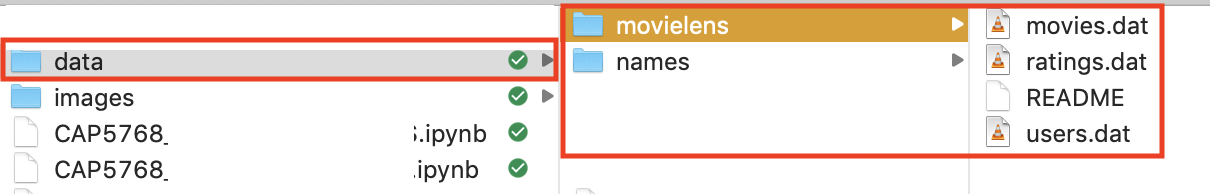

In [2]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s README file.

In [3]:
# Uncomment to see details of the movies datasets
# !cat 'data/movielens/README'

## Solution

### How many users are stored in the users table and what information is stored for each user?

In [4]:
len(users)

6040

In [5]:
users.dtypes

user_id        int64
gender        object
age            int64
occupation     int64
zip           object
dtype: object

In [6]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
users.gender.unique()

array(['F', 'M'], dtype=object)

In [8]:
users.occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3, 14,  4, 11,  8, 19,  2,
       18,  5, 13,  6])

There are 6,040 users. For each one of them the dataset has:

* `user_id`: a unique id, stored as an integer.
* `gender`: a character that identifies the user's gender - possible values are `F` and `M`.
* `age`: user's age range, coded as explained in the _README_ file, stored as an integer.
* `occupation`: user's occupation, coded as an integer.
* `zip`: user's ZIP code, stored as a string.


### How many movies are stored in the movies table and what information is stored for each movie?

In [9]:
len(movies)

3883

In [10]:
movies.dtypes

movie_id     int64
title       object
genres      object
dtype: object

In [11]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


There are 3,883 movies. For each movie the dataset has:

* `movie_id`: a unique id, stored as an integer.
* `title`: a string with the movie title and year.
* `genres`: all genres for the movie, separated by `|`.

### How many ratings are stored in the ratings table and what information is stored for each rating?

In [12]:
len(ratings)

1000209

In [13]:
ratings.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [14]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [15]:
ratings.rating.unique()

array([5, 3, 4, 2, 1])

There are 1,000,209 ratings. For each rating the dataset has:

* `user_id`: the id of the user who rated the movie.
* `movied_id`: the id of the rated movie.
* `rating`: the user rating, in a range from 1 to 5, as an integer.
* `timestamp`: seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970 ([source](http://files.grouplens.org/datasets/movielens/ml-20m-README.html)).


### How are users, the movies each user has rated, and the rating related?

They are related by their id fields, `user_id` and `movie_id`.

# Your turn! (24 points, i.e., 6 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):
5. What is the occupation that maps to most of the users? Plot a bar chart of the occupation counts and report the size of the largest bin.
6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

## Solution

(ENTER YOUR ANSWERS HERE)

### 5. What is the occupation that maps to most of the users? Plot a bar chart of the occupation counts and report the size of the largest bin.

Most of the time we are interested in asnwering questions, e.g. "what is the most frequent occupation". Therefore we will graph them in sorted order. Also, to help the reader get a sense of proportion, the title includes the user count.

In [16]:
occupation_by_users = users.groupby('occupation')['user_id'] \
    .count().sort_values(ascending=False)

In [17]:
print('Occupation with most users: {}'
      .format(occupation_by_users.sort_values(ascending=False).index[0]))

Occupation with most users: 4


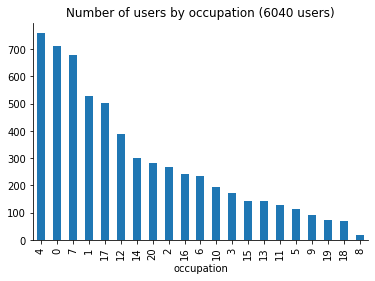

In [18]:
title = 'Number of users by occupation ({} users)'.format(len(users))
ax = occupation_by_users.plot(kind='bar', title=title)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 6. What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value.

According to the README file:
    
>  Age is chosen from the following ranges:
>
>    *  1:  "Under 18"
>    * 18:  "18-24"
>    * 25:  "25-34"
>    * 35:  "35-44"
>    * 45:  "45-49"
>    * 50:  "50-55"
>    * 56:  "56+"

Thus "50 years old or older" encompasses two groups, "50" and "56".

In [19]:
fifty_or_older = users.eval('(age == 50) | (age == 56)')
c = len(users[fifty_or_older])
print('There are {} ({:.2f}%) users who are 50 years old or older'
     .format(c, c/len(users)*100))

There are 876 (14.50%) users who are 50 years old or older


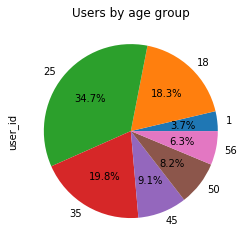

In [20]:
users.groupby('age').count()['user_id'].plot(
    kind='pie', autopct='%1.1f%%', title='Users by age group');

### 7. Which movie received the highest number of ratings (and how were such ratings distributed)?

In [21]:
highest_number_ratings = ratings.groupby('movie_id')['rating'] \
    .count().sort_values(ascending=False).index[0]
movies[movies['movie_id'] == highest_number_ratings]

,movie_id,title,genres
2789,2858,American Beauty (1999),Comedy|Drama


,user_id,percentage
rating,,
1,83,2.421237
2,134,3.908985
3,358,10.443407
4,890,25.962660
5,1963,57.263711


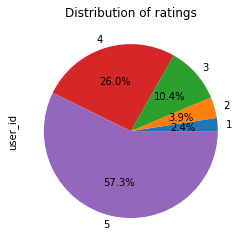

In [22]:
# calculate absolute number of ratings for that movie, by rating
num_ratings = pd.DataFrame(
    ratings[ratings['movie_id'] == highest_number_ratings] \
    .groupby('rating')['user_id'].count())

# calculate percentage (distribution) for each rating
num_ratings['percentage'] = num_ratings['user_id'] / num_ratings['user_id'].sum() * 100

# Print and graph
display(num_ratings)
num_ratings['user_id'].plot(kind='pie', autopct='%1.1f%%',
                            title='Distribution of ratings')

### 8. What is the average rating for all movies/users?

In [23]:
print('The average rating for all movies/users: {:.1f}'
    .format(ratings['rating'].sum() / len(ratings)))

The average rating for all movies/users: 3.6


-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [24]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [25]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
display(mean_ratings[:3])

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333


In [26]:
# Group ratings by title
ratings_by_title = data.groupby('title').size()
#display(ratings_by_title.index)
display(ratings_by_title[:3])

title
$1,000,000 Duck (1971)       37
'Night Mother (1986)         70
'Til There Was You (1997)    52
dtype: int64

In [27]:
# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]
display(active_titles[:3])

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)'],
      dtype='object', name='title')

In [28]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
display(mean_ratings[:3])

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000


In [29]:
# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [30]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings.head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# Your turn! (10 points, i.e., 5 pts each)

Modify the Python code to:
9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

## Solution

### 9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.

In [31]:
mean_ratings.sort_values(by='M', ascending=False).head(10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


### 10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

According to the README file:
    
> Age is chosen from the following ranges:
>
>        *  1:  "Under 18"

Note that the "top 10 favorite" movies may end up being more than ten movies, once we account for rating ties. That's what happened in this case. There 17 movies in the "top 10 favorite" list because of ties in ratings.

In [32]:
age_mean_ratings = data.pivot_table('rating', index='title',
                                    columns='age', aggfunc='mean')

# Select movies with 300 ratings or more
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title >= 300]
age_mean_ratings = age_mean_ratings.loc[active_titles]

# Select ratings for young viewers
young_mean_ratings = age_mean_ratings[1]

# Account for possible ties: get the top ten rating values
top_ten_ratings = young_mean_ratings.sort_values(
    ascending=False).unique()[:10]

# Show all movies that fall into the "top 10 ratings" range
with pd.option_context('display.max_rows', None):
    print(young_mean_ratings[young_mean_ratings >= top_ten_ratings[-1]] \
          .sort_values(ascending=False))

title
Metropolis (1926)                                4.888889
GoodFellas (1990)                                4.840000
Third Man, The (1949)                            4.818182
Double Indemnity (1944)                          4.777778
Fried Green Tomatoes (1991)                      4.750000
Piano, The (1993)                                4.750000
Raging Bull (1980)                               4.714286
Roman Holiday (1953)                             4.687500
Citizen Kane (1941)                              4.680000
Charade (1963)                                   4.666667
Manchurian Candidate, The (1962)                 4.666667
From Here to Eternity (1953)                     4.666667
Notorious (1946)                                 4.666667
Real Genius (1985)                               4.666667
Apostle, The (1997)                              4.666667
Princess Mononoke, The (Mononoke Hime) (1997)    4.636364
Bridge on the River Kwai, The (1957)             4.636364
Name: 1,

Precocious these youngsters seem to be... Or perhaps the lesson here is "don't trust in self-identified data" (who knows what the actual age is of those users).

# BONUS! (up to 20 points)

Write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:
- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

Hint/Convention: ``mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']``

## Solution

### The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.

In [33]:
# mean_ratings was created above, with movies that have 250 ratings or more
mean_ratings['Preferred by F'] = mean_ratings['F'] - mean_ratings['M']
mean_ratings.sort_values(by='Preferred by F', ascending=False)[:10]

gender,F,M,Preferred by F
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
Anastasia (1997),3.800000,3.281609,0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
"Color Purple, The (1985)",4.158192,3.659341,0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,0.487561


### The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

In [34]:
mean_ratings.sort_values(by='Preferred by F', ascending=True)[:10]

gender,F,M,Preferred by F
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


# BONUS! (up to 10 points)

Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. 

Hint: Disagreement can be measured by the _variance_ or _standard deviation_ of the ratings.

## Solution

### Write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. 

Step 1: count how many votes each movie received in the 1-5 rating scale. This gives the raw disagreement count.

In [35]:
total_ratings = data.pivot_table('user_id', index='title',
                                columns='rating', aggfunc='count')
total_ratings.head(3)

rating,1,2,3,4,5
title,,,,,
"$1,000,000 Duck (1971)",3.0,8.0,15.0,7.0,4.0
'Night Mother (1986),4.0,10.0,25.0,18.0,13.0
'Til There Was You (1997),5.0,20.0,15.0,10.0,2.0


Step 2: Change the raw counts into ratios, to normalize by number of reviewers. Otherwise movies with more reviewers would naturally have higher disagreement, just by having larger numbers in the calculations we will do later.

In [36]:
sum_ratings = total_ratings.sum(axis=1)
for c in total_ratings.columns:
    total_ratings[c] /= sum_ratings
    
# Check that we normalized correctly
assert(np.allclose(total_ratings.sum(axis=1), 1))

total_ratings.head(3)

### TODO: change to apply + lambda

rating,1,2,3,4,5
title,,,,,
"$1,000,000 Duck (1971)",0.081081,0.216216,0.405405,0.189189,0.108108
'Night Mother (1986),0.057143,0.142857,0.357143,0.257143,0.185714
'Til There Was You (1997),0.096154,0.384615,0.288462,0.192308,0.038462


Step 3: Calculate a _disagreement measure_. We will use `std()` for that.

In [37]:
total_ratings['disagreement'] = total_ratings.std(axis=1)
total_ratings.head(3)

rating,1,2,3,4,5,disagreement
title,,,,,,
"$1,000,000 Duck (1971)",0.081081,0.216216,0.405405,0.189189,0.108108,0.127629
'Night Mother (1986),0.057143,0.142857,0.357143,0.257143,0.185714,0.113838
'Til There Was You (1997),0.096154,0.384615,0.288462,0.192308,0.038462,0.140398


Step 4: Filter by number of reviewers, sort and display results

Note that we want the movies with the lowest standard deviation. That means the ratings are more evenly spread in the rating scale, indicating reviewers do not agree on a rating. High standard deviation happens when one of the ratings receives most of the votes, indicating consensus.

In [38]:
total_ratings = total_ratings.loc[active_titles]
total_ratings.sort_values(by='disagreement', ascending=True).head(10)

rating,1,2,3,4,5,disagreement
title,,,,,,
"Blair Witch Project, The (1999)",0.177041,0.173808,0.235247,0.268391,0.145513,0.050253
Natural Born Killers (1994),0.157143,0.150000,0.254286,0.268571,0.170000,0.056758
Dumb & Dumber (1994),0.159091,0.125758,0.269697,0.254545,0.190909,0.061443
Billy Madison (1995),0.112676,0.188732,0.278873,0.242254,0.177465,0.063770
Eyes Wide Shut (1999),0.116402,0.193651,0.231746,0.288889,0.169312,0.064961
Bicentennial Man (1999),0.177546,0.187990,0.289817,0.240209,0.104439,0.069757
"Rocky Horror Picture Show, The (1975)",0.117599,0.143552,0.262774,0.282238,0.193836,0.071969
Scary Movie (2000),0.146819,0.185971,0.292007,0.259380,0.115824,0.074333
Babe: Pig in the City (1998),0.107075,0.156788,0.260038,0.290631,0.185468,0.075054


# BONUS! (up to 10 points)

Write Python code to answer the question: 
What is the most popular movie genre? 
Plot a bar chart of the genre counts and report the size of the largest bin.

Hint: use the original **movies** data frame, _before_ the merge!

## Solution

With thanks to [this Stackoverflow answer](https://stackoverflow.com/a/52133059/336802) for pointing to the Pandas [`get_dummies` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

This is done in two steps:

1. `get_dummies()` splits the genres into columns ([hot-encodes](https://en.wikipedia.org/wiki/One-hot) them).
1. `sum()` adds all the 1s that `get_dummies()` created.

Although we can do it all in one line, we will do in steps to understand it better.

Step 1: split the genres into hot-encoded columns

In [39]:
genres = movies.genres.str.get_dummies()
genres.head(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Step 2: count each genre and sort them so the chart looks better.

In [40]:
genres = genres.sum().sort_values()
genres.head(3)

Film-Noir    44
Fantasy      68
Western      68
dtype: int64

Step 3: plot the genres and customize the graph to increase information/pixels ratio.

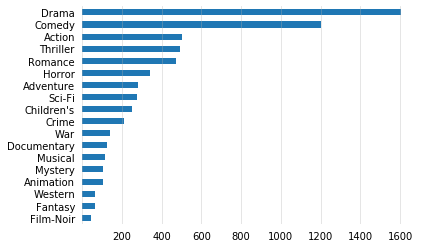

In [41]:
ax = genres.plot.barh()

# Remove box around the graph
for s in ('right', 'left', 'top', 'bottom'):
    ax.spines[s].set_visible(False)

# Remove all tick marks
plt.tick_params(bottom=False, top=False, left=False, right=False)

# Show a vertical grid to help size the bars
ax.grid(axis='x', alpha=0.4)

# And now, nitpicking (zero can be inferred)
ax.xaxis.get_major_ticks()[0].label1.set_visible(False) 

The largest category, as requested in the question.

In [42]:
print('The largest movie category is {}, with {} movies' 
      .format(genres.tail(1).index[0],genres[-1]))

The largest movie category is Drama, with 1603 movies


------------
## Part 2: Titanic

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [43]:
titanic = sns.load_dataset('titanic')

In [44]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Questions 11-14 (16 points total, i.e. 4 pts each)

Look at the Python code below and answer the following questions (expressing the amounts in absolute terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive?
13. How many male passengers did not survive (regardless of their class)?
14. How many third class male passengers did not survive?

In [45]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


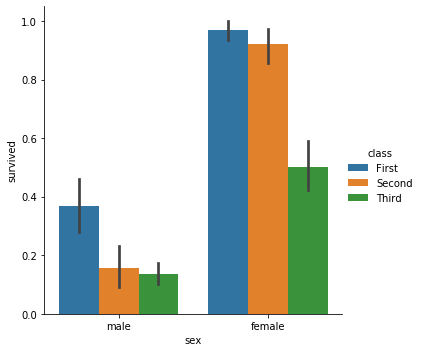

In [46]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

## Solution

### 11. How many female passengers did not survive (regardless of their class)?

In [47]:
def genre_died(genre):
    return (titanic['sex'] == genre) & (titanic['survived'] == 0)

print('{} female passangers did not survive'.format(
    len(titanic[genre_died('female')])))

81 female passangers did not survive


### 12. How many first class female passengers did not survive?

In [48]:
print('{} first class female passengers did not survive'.format(
    len(titanic[genre_died('female') & (titanic['class'] == 'First')])))

3 first class female passengers did not survive


### 13. How many male passengers did not survive (regardless of their class)?

In [49]:
print('{} male passangers did not survive'.format(
    len(titanic[genre_died('male')])))

468 male passangers did not survive


### 14. How many third class male passengers did not survive?

In [50]:
print('{} third class male passengers did not survive'.format(
    len(titanic[genre_died('male') & (titanic['class'] == 'Third')])))

300 third class male passengers did not survive


## Your turn! (12 points, i.e., 4 pts each)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

15. How many passengers (absolute number) were there per deck/class? 

(**Hint**: The plot below shows how decks and classes were related and provides a visual estimate.)
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

![Passengers per deck and class](notebook_images/titanic_passengers_deck_class.png)
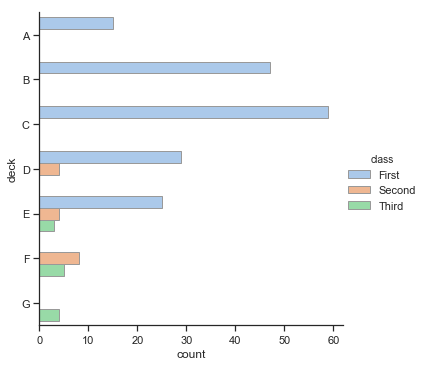

## Solution

### 15. How many passengers (absolute number) were there per deck/class? 

First we need to fix the missing deck entries. Because it is a category, we need to expand the category with a value that represents "missing".

In [51]:
# https://stackoverflow.com/a/36193135
titanic.deck = titanic.deck.cat.add_categories(['Unknown'])
titanic.deck.fillna('Unknown', inplace=True)

With that in place, we can find the counts with the pivot table. We could `count` on different columns to get the number of passagers, so we picked a column that does not have `NaN`(or we would have to deal with that first).

In [52]:
# Aggregate by `count` to consider all passengers (survivors or not)
# To show only survivors (survived=1), aggregate by `sum` 
titanic.pivot_table('survived', index='deck', columns='class',
                    aggfunc='count', margins=True, fill_value='')

class,First,Second,Third,All
deck,,,,
A,15,,,15
B,47,,,47
C,59,,,59
D,29,4,,33
E,25,4,3,32
F,,8,5,13
G,,,4,4
Unknown,41,168,479,688
All,216,184,491,891


### 16. How many passengers (absolute number) in Deck A survived?

In [53]:
print('{} passengers in deck A survived'
      .format(len(titanic.query('(deck == "A") & (survived == 1)'))))

7 passengers in deck A survived


### 17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

In [54]:
titanic[titanic['deck'] == 'E'].pivot_table(
    'survived', index='class', aggfunc='sum', margins=True)

,survived
class,
First,18
Second,3
Third,3
All,24


Why `aggfunc('sum')` works here: `survived` is an integer with 0 or 1 as value. Summing up that column is the same as counting survivors (the 1s).

# BONUS! (up to 20 points)

Write Python code to answer the following questions (using percentage values):
- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

## Solution

### How many women traveling alone did not survive?

In [55]:
print('{} women travelling alone did not survive'
      .format(len(titanic.query('(sex == "female") & alone & (survived == 0)'))))

27 women travelling alone did not survive


### How many men 35 years old or younger did not survive?

In [56]:
print('{} men 35 years old or younger did not survive'
      .format(len(titanic.query('(sex == "male") & (age <= 35) & (survived == 0)'))))

242 men 35 years old or younger did not survive


### What was the average fare per class?

Two solutions, for comparison.

In [57]:
titanic.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [58]:
# aggregration by `mean` is the default
titanic.pivot_table('fare', index='class')

,fare
class,
First,84.154687
Second,20.662183
Third,13.675550


------------
## Part 3: US Baby Names 1880–2018

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

After downloading the 'National data' file _names.zip_ and unzipping it, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

For your convenience, I have made the _names.zip_ file available on Canvas. 
Before running the cell below, make sure that you have downloaded it, unzipped it, and placed its contents under the 'data' folder. 

<img src="notebook_images/births_path.png" width="500" align="left">
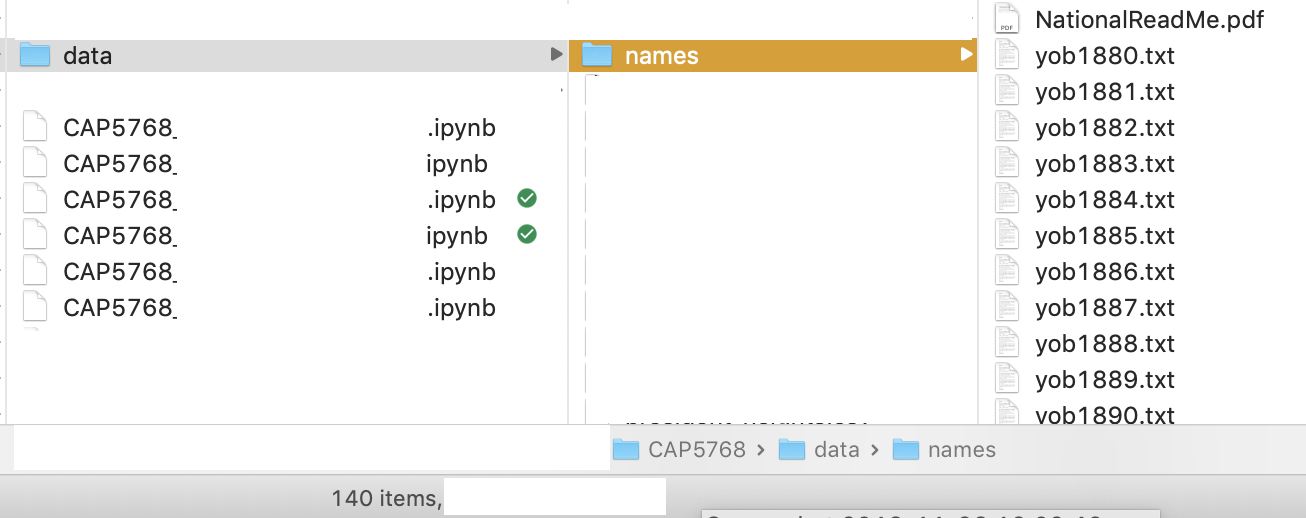

In [59]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [60]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


## Your turn! (25 points)

Write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time. 

Hint: Start by aggregating the data at the year and sex level using ``groupby`` or ``pivot_table``.

Your plot should look like this:

![BIrths per year and sex](notebook_images/births_year_sex.png)
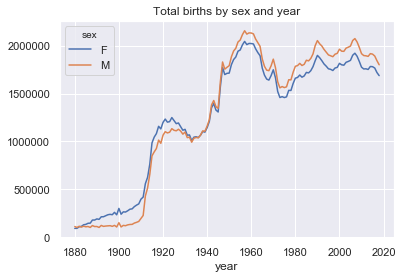

## Solution

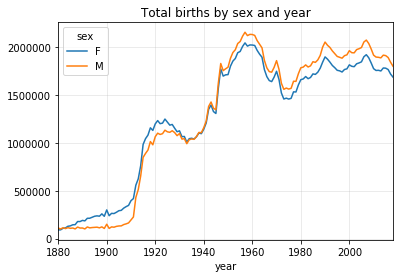

In [61]:
ax = names.pivot_table('births', index='year', columns='sex', aggfunc='sum') \
        .plot(title='Total births by sex and year')
ax.grid(alpha=0.3)

-------------
## Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year. 
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the absolute number of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [62]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [63]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [64]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [65]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [66]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [67]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [68]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [69]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


In [70]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,239.0,NaN,4883.0,266.0,531.0,7392.0,NaN,NaN,NaN,NaN,...,5877.0,7411.0,366.0,NaN,NaN,NaN,NaN,NaN,666.0,NaN
2015,297.0,NaN,4863.0,NaN,540.0,7159.0,211.0,NaN,NaN,NaN,...,6041.0,6944.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN
2016,NaN,284.0,4641.0,NaN,519.0,7157.0,NaN,NaN,NaN,NaN,...,5743.0,6444.0,312.0,NaN,NaN,NaN,NaN,NaN,889.0,248.0


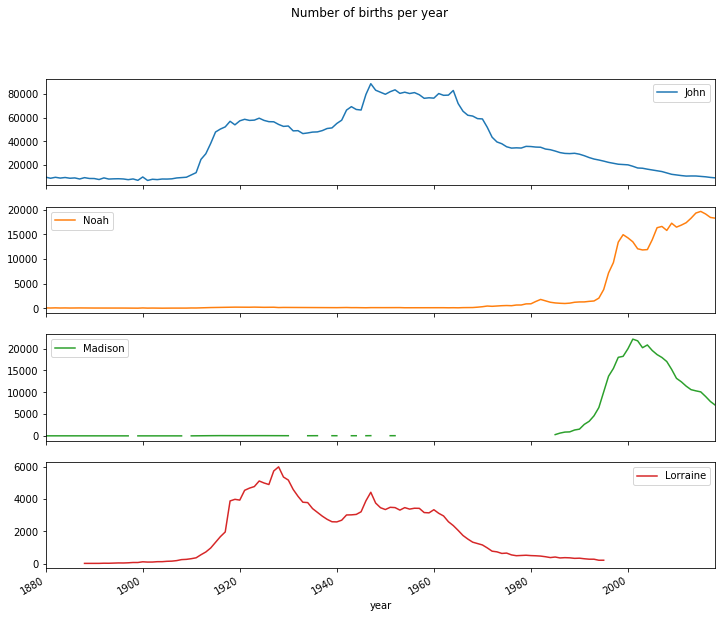

In [71]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
ax = subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")
# ax = subset.plot(subplots=True, figsize=(12, 10), grid=False,
#             title="Number of births per year", ylim=(0,0.1))

--------------
# BONUS! (up to 25 points)

Write Python code to test the hypothesis:

H1: There has been an increase in naming diversity over time. 

Hint: Compute a metric that consists of the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births, and plot that metric over time.

Your plot should look like this:

![Birth diversity](notebook_images/birth_names_top_50.png)
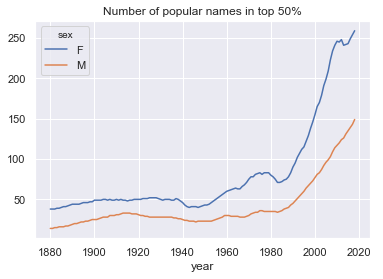

## Solution

### _Diversity_ as "more names are being used"

This is the simplest possible measure of name diversity: more names are being used over time.

The graph shows that the number of unique names being used increased rapidly until the early 2000s. After that it started to decrease (more pronouncedly for girl names). By this metric, name diversity greatly increased during the 20<sup>th</sup> century, but in the 21<sup>st</sup> century it is decreasing.

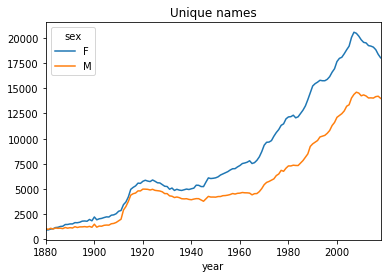

In [72]:
names_by_year = names.pivot_table('name', index='year', columns='sex',
                           aggfunc='count', fill_value=0)
names_by_year.plot(title='Unique names');

### _Diversity_ as "more names in the top 50% births"

Another way to look at diversity is to inspect the names responsible for 50% of total number of births.

We will inspect them in two ways:

1. The absolute number of names
1. The percentage of names 

The graph below shows the total number of names accounting for 50% of the number of births.

It shows that in general name diversity is growing over time, with a few declines, but generally trending up.

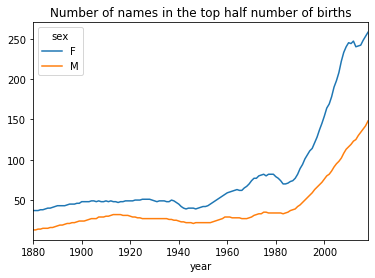

In [73]:
def get_count_top_half(group):
    # Our dataset is already sorted by number of births, but we should
    # be defensive and not assume that, or the cumsum code will break
    group = group.sort_values(by='prop', ascending=False)
    return len(group[group['prop'].cumsum() <= 0.5])

# Count of births in the top half of total births
count_top_50_births = names.groupby(['year', 'sex']).apply(get_count_top_half)
# Move genre to a column, in preparation to plot it
count_top_50_births = count_top_50_births.unstack()

count_top_50_births.plot(
    title='Number of names in the top half number of births');

The next graph looks at the same metric, but now in relative terms. It shows the percentage of names accounting for 50% of the number of births, in relation to the total number of unique boy and girl names used in that year (also in a ten-year rolling average).

It shows a different picture than the previous graph. Although more names are being used (see previous graph), they represent a smaller percentage of the names parent could have picked in a given year. By this metric, in general diversity decreased most of the time. It started to grow again in the 1990s, but it is still not at the same level it was over a century ago.

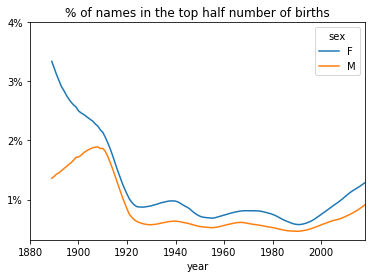

In [74]:
def get_prop_top_half(group):
    # Our dataset is already sorted by number of births, but we should
    # be defensive and not assume that, or the cumsum code will break
    group = group.sort_values(by='prop', ascending=False)
    return len(group[group['prop'].cumsum() <= 0.5]) / len(group)

# Proportion of births in the top half of total births
pct_top_50_births = names.groupby(['year', 'sex']).apply(get_prop_top_half)
# Move genre to a column, in preparation to plot it
pct_top_50_births = pct_top_50_births.unstack()

# Plot 10-year decade average to smooth out the graph, so we
# concentrate on trends, not in the year-to-year noise
pct_top_50_births.rolling(window=10).mean().plot(
    title='% of names in the top half number of births')
# Make the ticks more readable (match the graph title)
plt.yticks([0.01, 0.02, 0.03, 0.04], ['1%', '2%', '3%', '4%']);

-------------
## Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations). 

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [75]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [76]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [77]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<Figure size 432x288 with 0 Axes>

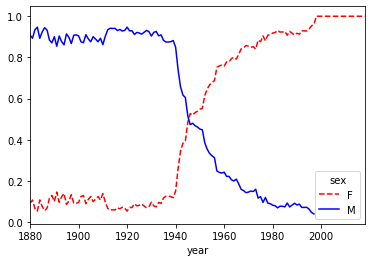

In [78]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})

---------------------

Now it's time for you to come up with a different hypotheses, which we will call H2. **Be creative!**

Example: The name 'Reese' has been more prevalent among baby girls than baby boys since 2000.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

According to [Wikipedia's article "Naming in the United States"](https://en.wikipedia.org/wiki/Naming_in_the_United_States#Gender):

> Gender name usage also plays a role in the way parents view names. It is not uncommon for American parents to give girls names that have traditionally been used for boys. Boys, on the other hand, are almost never given feminine names. Names like Ashley, Sidney, Aubrey, and Avery originated as boys' names. Traditionally masculine or androgynous names that are used widely for girls have a tendency to be abandoned by the parents of boys and develop an almost entirely female usage

Given that statement, the hypothesis we will test is:

**H2: Once a predominantly boy name is adopted by 50% or more of girls, within one generation ([about 30 years](https://en.wikipedia.org/wiki/Generation)) it will become almost exclusively (over 80%) a girl name.**

To test the hypothesis we will use the list of names mentioned in the Wikipedia article (Ashley, Sidney, Aubrey, and Avery) against the full list of names.

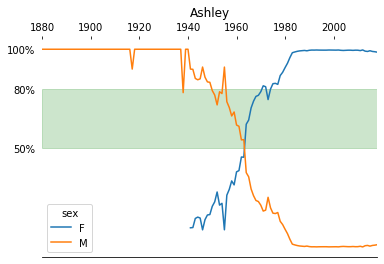

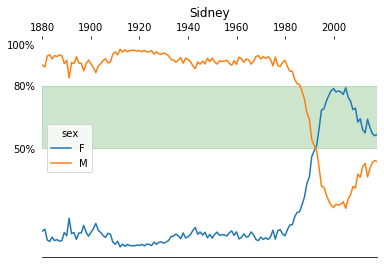

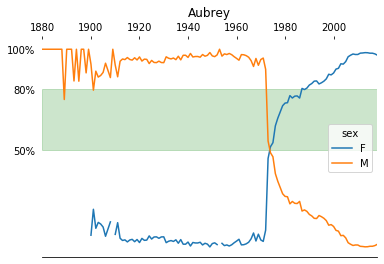

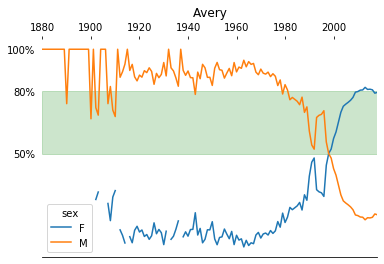

In [79]:
import re

def plot_name(name):
    this_name = names[names['name'] == name]

    # Count by year/sex
    table = this_name.pivot_table('births', index='year',
                                  columns='sex', aggfunc='sum')

    # Change count to proportion F/M in each year
    table = table.div(table.sum(axis='columns'), axis='rows')

    # Plot the proportions
    ax = table.plot(title=name, label='')

    # Format the graph to help analyze the hypothesis
    # 1. Mark the 50% and 80% levels we are using in the hypothesis
    ax.axhspan(0.5, 0.8, alpha=0.2, color='green')
    # 2. Show only those labels to draw even more attention to them
    #    And remove the tick marks from those label to clean up a bit
    plt.yticks([0.5, 0.8, 1.0], ['50%', '80%', '100%'])
    plt.tick_params(left=False)
    # 3. Remove the boxes (noise, most of the time)
    #    Leave bottom line to "ground" the graph
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # 4. Move years to the top, remove obvious "years" label
    #    The eyes now hit the year more quickly, making the
    #    purpose of the x axis clearer from the start
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_text('')

for name in ('Ashley', 'Sidney', 'Aubrey', 'Avery'):
    plot_name(name)

**Conclusion**: H2 is mostly true. With the exception of Sidney, other names migrate from boys to girls within about a decade. However, even with Sidney not quite following the same pattern, we can say that H2 is a good predictor for the pattern of a boy name becoming a girl name in a relatively short amount of time, once it is used as a girl name by half of the births.

## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

### What have you learned from this assignment?

* `pivot_table` - before this assignment, I used `groupby` for these types of problems. Now I have a better understanding of pivot tables.
* `query` - before this assignment, I used traditional filtering. `query()` is cleaner, thus easier to follow and to maintain.
* Got a bit better in cleaning up graphs (removing boxes, making grids less prominent, etc.). Used in one example so far (the movie genres horizontal bar graph), but getting more confident in the APIs to try in other graphs in the future.

### Which parts were the most fun, time-consuming, enlightening, tedious?

Fun:

* Exploring data with graphs continue to be fun :)
* Learning how to customize graphs also continues to be fun and educational

Enlightening:

* The power of `pivot_table`
* The cleaness of `query`
* Defining "diversity" is harder than it looks


Tedious:

* None

### What would you do if you had an additional week to work on this?

* Investigate when `query()` is slower than traditional filtering. The textbook has some general statements, but no specific guidelines.
* Try `pivot_table` even more. I struggle to define what should be the main variable, the index and the columns in a few cases. I would like for that to come more naturally to me, i.e. first visualize I want to get done, then effortlessly translate that into the different pieces of the `pivot_table` API.